<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر بیگی
</font>
<p></p>
<br>
<font>
<b>تمرین چهارم</b>
</font>
<br>
<br>
موعد تحویل: ۶ بهمن <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

## **mobina salimipanah - 99109788**

<div dir="rtl">

<font face="XB Zar" size=4>
    <h1>
    <b>پیاده‌سازی Crawler (20 نمره)</b>
    </h1>
</font>

<br>

<font face="XB Zar" size=3>
   در این بخش باید یک Crawler برای استخراج اطلاعات تعدادی مقاله از سایت <a href="https://www.semanticscholar.org/">Semantic Scholar</a> پیاده سازی کنید.
   اطلاعات مورد نظر برای استخراج، باید حاوی موارد زیر باشند:
</font>

</div>

<br>

<table dir="ltr" style="width: 100%; border-collapse: collapse;">
  <tr>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">ID</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Title</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Publication Year</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Authors</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Related Topics</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Citation Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Reference Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">References</th>
  </tr>
  <tr>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Title of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Unique ID of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Publication year</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Name of all authors separated with ","</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Name of all topics separated with ","</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Number of citations of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Number of references of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">ID of the first 10 references separated with ","</td>
  </tr>
</table>

<div dir="rtl">

<font face="XB Zar" size=3>
  فرایند استخراج را از ۵ مقاله‌ی اولیه‌ی هر استاد شروع کنید و ۱۰ مرجع اول هر مقاله را به صف مقالات اضافه کنید.
  فرایند استخراج را تا زمانی که اطلاعات ۱۰۰۰ مقاله را داشته باشید ادامه دهید.
  اطلاعات مقالات را در فایل <code dir="ltr">${Professor Name}.json</code> ذخیره کنید.
</font>

</div>

<br>

<div dir="rtl">

<font face="XB Zar" size=3>
  در پیاده سازی Crawler به موارد زیر دقت کنید:
<ul>
<li>در زمان تحویل، کد Crawler شما اجرا خواهد شد و صحت عملکرد آن مورد بررسی قرار می‌گیرد.</li>
<li>حق استفاده از سرویس API سایت Semantic Scholar را ندارید.</li>
<li>بین هر بار درخواست از سایت، یک فاصله‌ی چند ثانیه‌ای بدهید کم‌تر دچار مشکل شوید (انجام این عمل ضروری است).</li>
<li>در صورتی که ‌Crawler شما دچار مشکلی مثل Request Timeout شد، نباید کار خود را متوقف کند و باید روند استخراج را ادامه دهد.</li>
<li>برای استخراج می‌توانید از پکیج‌هایی مثل <a href="https://www.selenium.dev/selenium/docs/api/py/">Selenium</a> و یا <a href="https://github.com/scrapy/scrapy">Scrapy</a>  استفاده کنید. همچنین برای تجزیه‌ی اطلاعات استخراج شده، می‌توانید از پکیج <a href="https://pypi.org/project/beautifulsoup4/">Beautiful Soup</a> استفاده کنید.</li>
</ul>
</font>

</div>

<br>

<div dir="rtl">

<font face="XB Zar" size=3>
  در صورتی که می‌خواهید از Scrapy برای پیاده‌سازی Crawler خود استفاده کنید، می‌توانید کد زیر را کامل کنید:
</font>

</div>

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import time
import json

In [6]:
class result:
    def __init__(self, Id, title, authors, date, abstract, references, topics, reference, citation):
        self.__dict__.update(
            Id=Id, title=title, authors=authors, date=date, abstract=abstract,
            references=references, topics=topics,
            reference=reference, citation=citation
        )

In [7]:
class scrapper:

    def __init__(self, name, start_urls=None, domain=None, limit=1000, max_ref=10, **kwargs):
        self.name = name
        self.start_urls = start_urls or [
                'https://www.semanticscholar.org/paper/Spatial-Aware-Dictionary-Learning-for-Hyperspectral-Soltani-Farani-Rabiee/5ca94050fcf3382b50ec44629c0dda80c8843558',
                'https://www.semanticscholar.org/paper/Deep-Private-Feature-Extraction-Ossia-Taheri/e1dcd7fd049ae2ae3b93295d8ea360cafc00f9da',
                'https://www.semanticscholar.org/paper/Multiresolution-Knowledge-Distillation-for-Anomaly-Salehi-Sadjadi/6885c45614f78f9d2e7cc8ef11b3c38b34e67f7d',
                'https://www.semanticscholar.org/paper/An-attribute-learning-method-for-zero-shot-Yazdanian-Shojaee/5a5f7d39433d68059e513b947a9fde62b5d4d3fe'
            ]
        self.domain = domain or 'https://www.semanticscholar.org'
        self.kwargs = kwargs
        self.limit = limit
        self.max_ref = max_ref
        self.visited = set()


    def get_page_content(self):

        soup = BeautifulSoup(self.page.content, "html.parser")
        if soup.find('div', {'class': 'verify-robot'}):
            raise Exception('Robot Verification')

        paper_id = self.page_url.split('/')[-1]
        title = soup.find('h1', {'data-test-id': 'paper-detail-title'}).text
        head = soup.findAll('head')
        tag = head[0].find('meta', {'name': 'description'})
        abstract = tag['content'] if tag else 'ERROR not found'
        year = soup.find('span', {'data-test-id': 'paper-year'}).text
        citation_refs = soup.find_all('h2', {'class': 'dropdown-filters__result-count__header dropdown-filters__result-count__citations'})
        citation = citation_refs[0].text.split(' ')[0] if len(citation_refs) > 0 else '0'
        num_reference = citation_refs[1].text.split(' ')[0] if len(citation_refs) > 1 else '0'
        dd = re.compile('author={(.*)}').findall(self.page.text)
        authors = dd.pop().split(' and ') if dd else []

        card_2_soup = soup.find('div', {'data-test-id': 'reference'})
        refs = []
        if card_2_soup:
            for reference in card_2_soup.find_all('div', {'class': 'cl-paper-row citation-list__paper-row'}):
                rlink = reference.find('a', {'class': 'link-button--show-visited'})
                if rlink:
                    _id = rlink.get('href').split('/')[-1]
                    refs.append(_id)

        topics = []
        if soup.find('ul', {'class': 'flex-row-vcenter paper-meta'}):
            topics = soup.find('ul', {'class': 'flex-row-vcenter paper-meta'}).findAll('li', {'class': 'paper-meta-item'})[2].text.split(', ')

        res = result(
            Id=paper_id,
            title=title,
            authors=authors,
            date=year,
            abstract=abstract,
            references=refs,
            topics=topics,
            reference=num_reference,
            citation=citation)

        return res

    def get_page(self, url):
        API_KEY = '232d2aa079f07e3b160c3ce71cc84297'
        payload = {'api_key': API_KEY, 'url': url}
        request = requests.get('http://api.scraperapi.com', params=payload)
        return request


    def next_url(self):
        try:
            next_url = self.queue.pop(0)
            self.visited.add(next_url)
            return next_url
        except:
            return None

    def page_urls(self):
        urls = []
        soup = BeautifulSoup(self.page.text, "html.parser")
        soup.find('div', {'data-test-id': 'cited-by'})
        for reference in soup.find_all('div', {'class': 'cl-paper-row citation-list__paper-row'})[:self.max_ref]:
            try:
                url = self.domain + \
                    reference.find('a', {'class': 'link-button--show-visited'}).get('href')
                if url not in self.visited:
                    urls.append(url)
            except:
                pass

        return urls
    def crawl(self):

        self.queue = self.start_urls
        crawled_pages = []
        current_url = self.next_url()
        while current_url is not None and len(self.visited) < self.limit:
            print(current_url)
            self.page_url = current_url
            self.page = self.get_page(current_url)
            try:
                paper = self.get_page_content()
                crawled_pages.append(paper)
                self.queue.extend(self.page_urls())
            except Exception as e :
                print(e)
                pass
            current_url = self.next_url()
        return crawled_pages


In [8]:
def crawl_professors(profs, index=0):
    if index >= len(profs):
        return

    prof = profs[index]
    print(f"Starting crawling for Professor {prof}")

    with open(f'{prof}.txt', 'r') as file:
        start_urls = [line.strip() for line in file]

    scrap = scrapper(prof, start_urls=start_urls, limit=200, max_ref=10)
    papers = scrap.crawl()

    with open(f'{prof}.json', 'w') as file:
        json.dump([paper.__dict__ for paper in papers], file, indent=4)

    crawl_professors(profs, index + 1)

profs = ['Sharifi', 'Rabiee', 'Rohban', 'Kasaei','Soleymani']
crawl_professors(profs)

Starting crawling for Professor Sharifi
https://www.semanticscholar.org/paper/Inhibition-of-TGF%CE%B2-Signaling-Promotes-Ground-State-Hassani-Totonchi/8d6835be604459b317fd2f26f9db4a6118586740
https://www.semanticscholar.org/paper/Treatment-of-human-embryonic-stem-cells-with-of-and-Tahamtani-Azarnia/788db0c4d5b98e835027cc2331419bf6b26f1c77
https://www.semanticscholar.org/paper/Graph-Traversal-Edit-Distance-and-Extensions-Boroojeny-Shrestha/0d095dcf4fb6e4cc701db75c7a2c1076440d3df8
https://www.semanticscholar.org/paper/DNA-methylation-regulates-discrimination-of-from-a-Sharifi-Zarchi-Gerovska/3056edcdfb86ec86bb8de369ce0f7fa0fae40e82
https://www.semanticscholar.org/paper/Downregulation-of-Extracellular-Matrix-and-Cell-in-Hassani-Oryan/a3f82efd05a3f6dbced63d4450d64eae5a4ebb97
https://www.semanticscholar.org/paper/Suppression-of-transforming-growth-factor-%CE%B2-ground-Hassani-Pakzad/2257319ade5444d4c1e38bcba4e53f44a02ca17a
https://www.semanticscholar.org/paper/Low-Focal-Adhesion-Signaling-P

<div dir="rtl">

<font face="XB Zar" size=3>
  حال برای اجرای این Crawler، کافی است آن را درون فایل <code>scholar.py</code> قرار دهیم و سپس دستور زیر را اجرا کنیم:
</font>

</div>

<div dir="rtl">

<font face="XB Zar" size=4>
    <h1>
    <b>LSI (20 نمره)</b>
    </h1>
</font>
</div>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.feature_extraction.text import CountVectorizer

<div style="direction: rtl">
در گام نخست داده‌های استخراج شده را به شکل ماتریس term-document تشکیل دهید.
</div>

In [13]:
def load_sample_data():
    """
    Returns:
    Term-document matrix
    """
    df = pd.concat([pd.read_json(f'{name}.json') for name in profs], ignore_index=True)
    df['paper'] = df['title'] + ' ' + df['abstract']
    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(df['paper'])

    return matrix, df

In [16]:
term_document_matrix , df = load_sample_data()
df.head()
term_document_matrix

<1132x10648 sparse matrix of type '<class 'numpy.int64'>'
	with 127121 stored elements in Compressed Sparse Row format>

In [20]:
print(term_document_matrix[:29, :29].todense())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 

<div style="direction: rtl">
در گام بعد، روش LSI را روی این ماتریس ساخته شده اجرا کنید تا علاوه بر به دست آوردن component های U، S و Vt که از SVD به دست می‌آیند، خود ماتریس LSI هم به دست آید.
</div>

In [17]:
from sklearn.decomposition import TruncatedSVD

def perform_lsi(term_document_matrix, n_components=2):
    """
    Args:
    term_document_matrix: Term-document matrix
    n_components: Number of latent semantic dimensions
    Returns:
    Reduced-dimensional representation
    """
    lsi_model = TruncatedSVD(n_components=n_components)
    lsi_matrix = lsi_model.fit_transform(term_document_matrix)
    return lsi_matrix

In [27]:
lsi_matrix = perform_lsi(term_document_matrix)
lsi_matrix

array([[18.16373856,  7.09308567],
       [26.12812871, 13.16992627],
       [27.11152219, -3.52627116],
       ...,
       [17.23379212, -3.67786587],
       [19.22041836,  4.85374675],
       [16.98137964, -1.80073754]])

<div style="direction: rtl">
حال از روی ماتریس LSI به دست آمده، میزان شباهت document های مختلف را به دست آورید در فضای latent space.
</div>

In [21]:
def calculate_document_similarity(lsi_matrix):
    """
    Args:
    lsi_matrix: Reduced-dimensional representation
    Returns:
    Document similarity matrix
    """
    similarity = cosine_similarity(lsi_matrix)
    return similarity

In [22]:
document_similarity = calculate_document_similarity(lsi_matrix)
print(document_similarity)

[[1.         0.99553058 0.87679678 ... 0.83505718 0.99220521 0.88793797]
 [0.99553058 1.         0.82746563 ... 0.77936772 0.97600206 0.84053062]
 [0.87679678 0.82746563 1.         ... 0.99672752 0.92988469 0.99971958]
 ...
 [0.83505718 0.77936772 0.99672752 ... 1.         0.8971065  0.9945338 ]
 [0.99220521 0.97600206 0.92988469 ... 0.8971065  1.         0.93833486]
 [0.88793797 0.84053062 0.99971958 ... 0.9945338  0.93833486 1.        ]]


<div style="direction: rtl">
حال document های خود را در فضای Latent Space ساخته شده، نمایش دهید و document های از یک فیلد را با رنگ یکسان نمایش دهید و بررسی کنید آیا آنها نزدیک به یکدیگر قرار میگیرند؟  
</div>

<div style="direction: rtl">
برای هر مقاله، اولین فیلد related topics آن را به عنوان فیلد آن در نظر بگیرید
</div>

In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def visualize_documents(lsi_matrix,labels):
    """
    Args:
    lsi_matrix: Reduced-dimensional representation
    labels: List of document labels
    """
    fields = set(labels)
    mapping = dict(zip(fields, plt.cm.rainbow(np.linspace(0, 1, len(fields)))))

    for doc, field in zip(lsi_matrix, labels):
        plt.scatter(doc[0], doc[1], color=mapping[field], label=field)

    handles, field_labels = plt.gca().get_legend_handles_labels()
    unique_handles = dict(zip(field_labels, handles)).values()
    unique_labels = dict(zip(field_labels, handles)).keys()
    plt.legend(unique_handles, unique_labels)

    plt.title('Latent Space')
    plt.show()


['Biology', 'Medicine', 'Computer Science', 'Biology', 'Medicine', 'Biology', 'Biology', 'Medicine', 'Biology', 'Biology', 'Biology', 'Biology', 'Medicine', 'Biology', 'Medicine', 'Biology', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Biology', 'Biology', 'Medicine', 'Medicine', 'Medicine', 'Computer Science', 'Computer Science', 'Computer Science', 'Medicine', 'Computer Science', 'Computer Science', 'Computer Science', 'Computer Science', 'Computer Science', 'Biology', 'Biology', 'Biology', 'Medicine', 'Medicine', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Medicine', 'Medicine', 'Biology', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Biology', 'Medicine', 'Medicine', 'Agricultural and Food Sciences', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Medicine', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Biology', 'Materials Science', 'Biology', 'Biology', 'Medicine', '

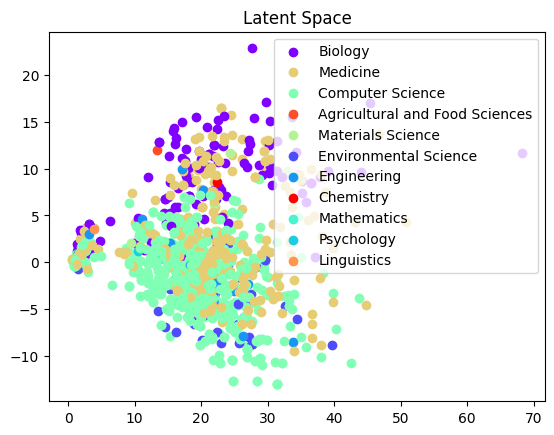

In [37]:
labels = [topic[0] for topic in df['topics']]
print(labels)
visualize_documents(lsi_matrix, labels)

<div style="direction: rtl">
در گام نهایی این بخش، روی داده‌های کاهش ابعاد شده که رسم هم کردید، الگوریتم K-Means Clustering را اجرا کنید و metric های ARI، AMI و Silhouette را برای خروجی این خوشه‌بندی به دست آورید. تعداد خوشه‌ها را به تعداد دسته‌بندی document ها در نظر بگیرید.
</div>

In [38]:
def perform_kmeans_clustering(lsi_matrix, num_clusters):
    """
    Args:
    lsi_matrix: Reduced-dimensional representation
    num_clusters: Number of clusters
    Returns:
    Cluster labels
    """
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(lsi_matrix)
    return kmeans.labels_

def calculate_clustering_metrics(labels_true, labels_pred):
    """
    Args:
    labels_true: True cluster labels
    labels_pred: Predicted cluster labels
    Returns:
    Dictionary containing clustering metrics
    """
    metrics = {
        'AMI': adjusted_mutual_info_score(labels_true, labels_pred),
        'ARI': adjusted_rand_score(labels_true, labels_pred),
        'Silhouette Score': silhouette_score(lsi_matrix, labels_pred)
    }
    return metrics

In [39]:
num_clusters = len(set(labels))
cluster_labels = perform_kmeans_clustering(lsi_matrix, num_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
clustering_metrics = calculate_clustering_metrics(labels, cluster_labels)
print(clustering_metrics)

{'AMI': 0.12753948503945978, 'ARI': 0.0719444277178662, 'Silhouette Score': 0.4003727042537131}


<div dir="rtl">

<font face="XB Zar" size=4>
    <h1>
    <b>شبکه‌های عصبی (45 نمره)</b>
    </h1>
</font>
</div>

<div align="center">
    <h1>Advanced Disaster Event Predictor Through The Use of Tweets</h3>
</div>


## Overview:

Twitter has become an important source of real-time information during disasters. However, it can be difficult to distinguish between tweets that are reporting real disasters and those that are using disaster-related language metaphorically. This project aims to build a machine learning model that can accurately predict which tweets are about real disasters.

The project will use a dataset of 10,000 hand-classified tweets to train and evaluate the model. The model will be trained to extract features from the tweets that are relevant to disaster prediction, such as the presence of disaster-related keywords and phrases, the sentiment of the tweet, and the user's location.

## Goal

- Develop an accurate classifier.


## Steps

- **Data Preparation:** Assess the quality of the data, handle missing values and outliers, and clean the data.
- **Exploratory Data Analysis:** Inspect the data to gain insights, explore the features, and extract the most useful and representative features.

- **Problem Definition and Evaluation:** Formally define the type of task, metrics, and evaluation methods.
- **Model Selection and Training:** Explore both traditional machine learning and deep learning algorithms to perform the task, and train the models.
- **Model Evaluation and Selection:** Evaluate the performance of the trained models on the test data.

# Download Data

In [17]:
import gdown
url = 'https://drive.google.com/uc?id=15R-o6L6gi3OZs8b97k_FTxliHCF5X1k5'

output = 'dataset.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=15R-o6L6gi3OZs8b97k_FTxliHCF5X1k5
To: /content/dataset.zip
100%|██████████| 598k/598k [00:00<00:00, 115MB/s]


'dataset.zip'

In [18]:
! unzip -q dataset.zip

replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


# Import

In [19]:
import os
import random
import re
import string
import sys
import warnings
from collections import defaultdict
from time import time

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import torch
import torch.nn
import transformers
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)
from torch import nn
from torch.optim import AdamW
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm
from transformers import AdamW, BertModel, BertTokenizer

from wordcloud import STOPWORDS

In [20]:
%matplotlib inline

SEED = 42
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [21]:
device = torch.device('cuda')
device

device(type='cuda')

# 1. Data

## 1.1. Features

The dataset includes the following features for each tweet:

- id: A unique identifier for the tweet.
- text: The text of the tweet.
- location: The location where the tweet was sent from.
- keyword: A particular keyword from the tweet (may be blank).
- target: Whether the tweet is about a real disaster (1) or not (0).

In [22]:
df_train = pd.read_csv('./train.csv', dtype={'id': np.int16, 'target': np.int8})
df_test = pd.read_csv('./test.csv', dtype={'id': np.int16, 'target': np.int8})

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.20 MB
Test Set Shape = (3263, 5)
Test Set Memory Usage = 0.08 MB


In [23]:
df_test.target.value_counts()

0    1861
1    1402
Name: target, dtype: int64

In [24]:
df_train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

## 1.2. Data Quality Assessment

### 1.2.1. Missing Values:

The training and test sets have identical missing value ratios for the `keyword` and `location` features, with 0.8% and 33% of values missing, respectively. This suggests that the missing values are likely due to random sampling, rather than any systematic bias. Therefore, the missing values in these features are **imputed** with the values `no_keyword` and `no_location`, respectively.

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int16 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
 4   target    3263 non-null   int8  
dtypes: int16(1), int8(1), object(3)
memory usage: 86.2+ KB


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int16 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int8  
dtypes: int16(1), int8(1), object(3)
memory usage: 200.9+ KB


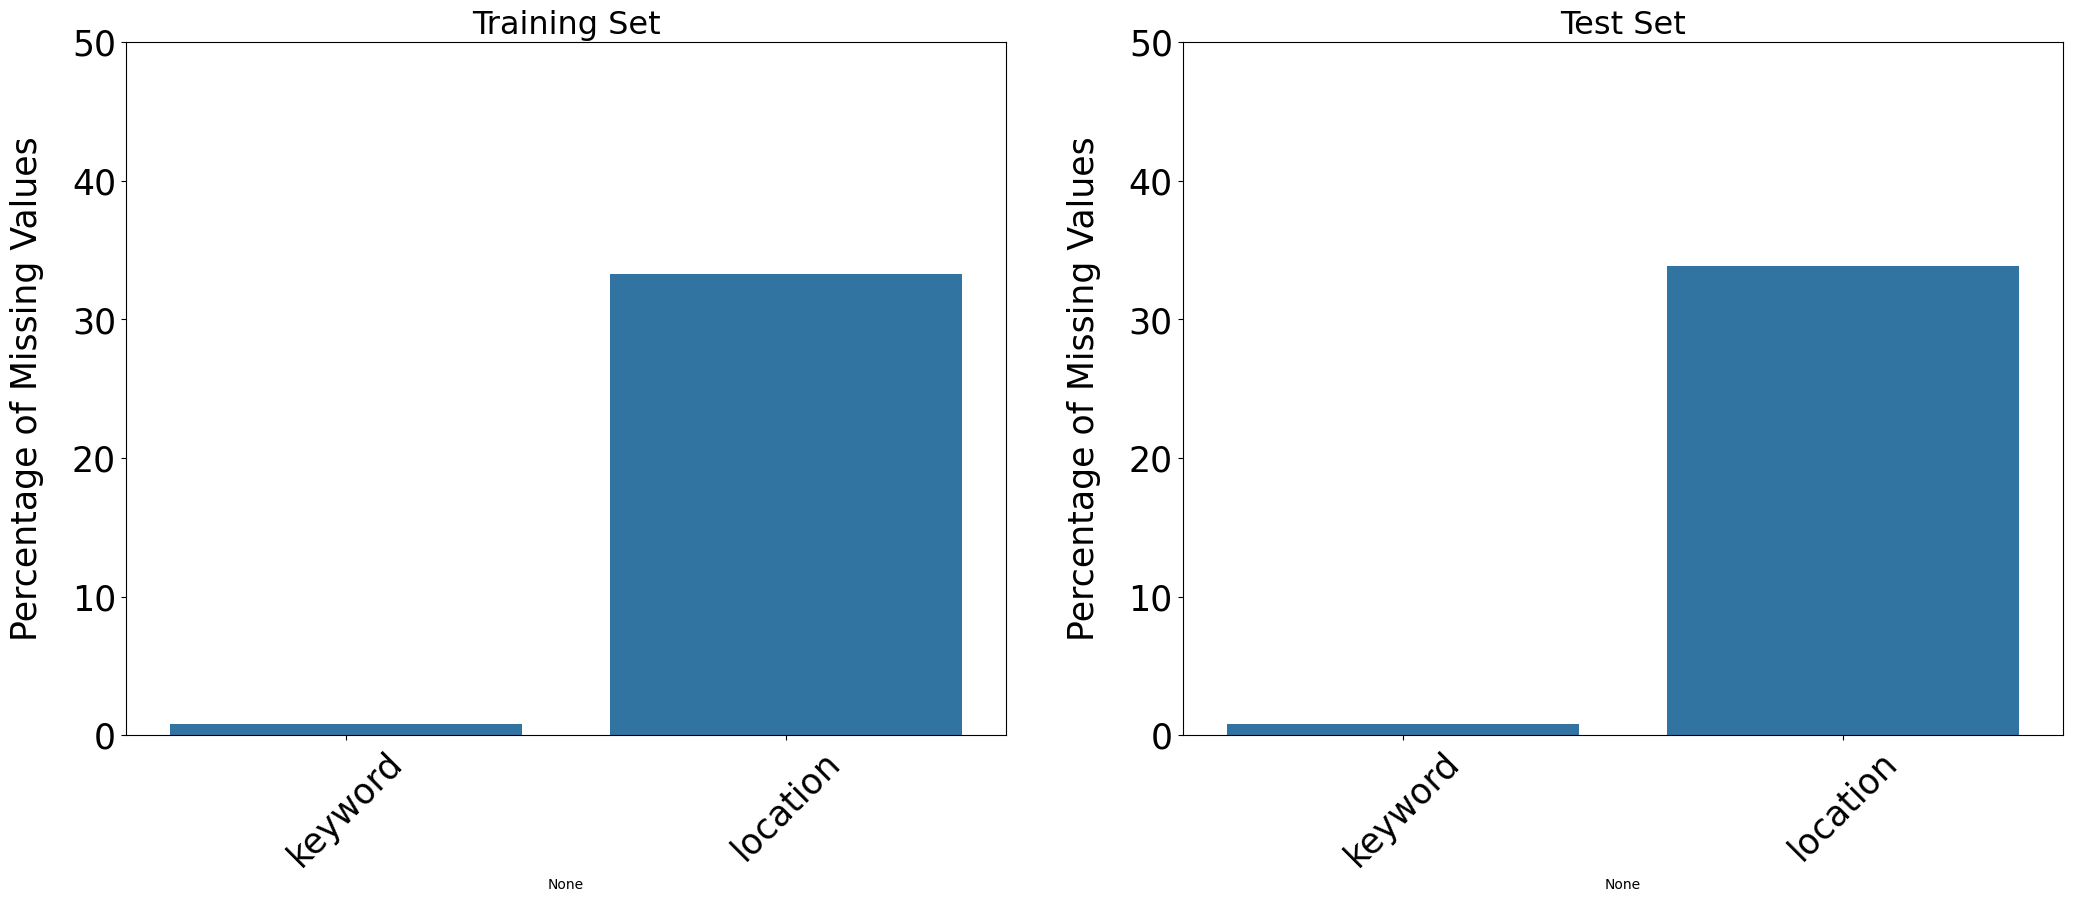

In [27]:
# Define missing columns
missing_cols = ['keyword', 'location']

# Calculate the percentage of null values for test and train sets
null_percentages = {}
for df, label in [(df_train, 'Training Set'), (df_test, 'Test Set')]:
    null_percentages[label] = df[missing_cols].isnull().mean() * 100

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(25, 9))

for i, (label, percentages) in enumerate(null_percentages.items()):
    sns.barplot(x=percentages.index, y=percentages.values, ax=axes[i])
    axes[i].set_ylabel('Percentage of Missing Values', size=25, labelpad=20)
    axes[i].tick_params(axis='x', labelsize=25, rotation=45)  # Rotate x-axis labels
    axes[i].tick_params(axis='y', labelsize=25)
    axes[i].set_title(label, fontsize=23)
    axes[i].set_yticks([0, 10, 20, 30, 40, 50])  # Set the same yticks for both plots

plt.show()

Both training and test set have same ratio of missing values in keyword and location.

0.8% of keyword is missing in both training and test set
33% of location is missing in both training and test set
Since missing value ratios between training and test set are too close, they are most probably taken from the same sample.

### 1.2.2 Impute Missing Fields

In [28]:
# Exercise 1 - impute nullable cols

# TODO
import pandas as pd

df_train['keyword'].fillna('no_keyword', inplace=True)
df_train['location'].fillna('no_location', inplace=True)
df_test['keyword'].fillna('no_keyword', inplace=True)
df_test['location'].fillna('no_location', inplace=True)

print(df_train.info())
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int16 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int8  
dtypes: int16(1), int8(1), object(3)
memory usage: 200.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int16 
 1   keyword   3263 non-null   object
 2   location  3263 non-null   object
 3   text      3263 non-null   object
 4   target    3263 non-null   int8  
dtypes: int16(1), int8(1), object(3)
memory usage: 86.2+ KB
None


 Missing values in those features are filled with no_keyword and no_location respectively.

## 1.3. Data Exploration

To select or design an appropriate algorithm for achieving our goals, given the data we have, we should first understand the characteristics of the data.

### 1.3.1. Target Distribution

The class distribution for the target variable is 57% for 0 (Not Disaster) and 43% for 1 (Disaster). The classes are almost equally balanced, so stratification by target is not necessary during cross-validation.

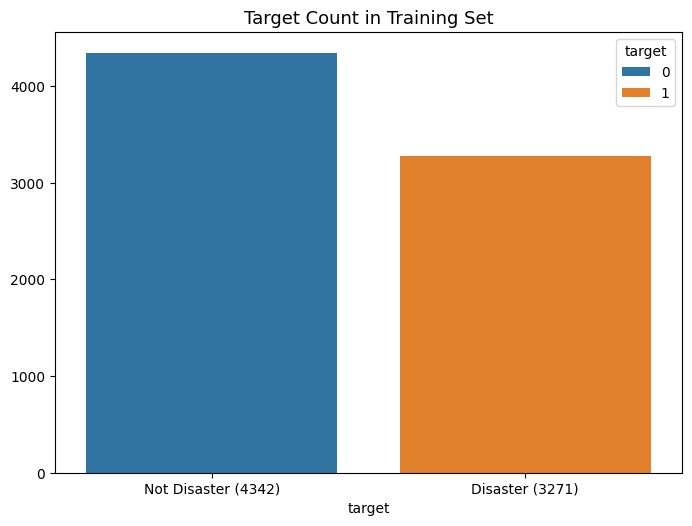

In [29]:
def plot_target_distribution(df):
    fig, axes = plt.subplots(ncols=1, figsize=(7, 5), dpi=100)
    plt.tight_layout()

    sns.countplot(x=df['target'], hue=df['target'], ax=axes)

    axes.set_ylabel('')
    axes.set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])
    ''
    axes.tick_params(axis='x')
    axes.tick_params(axis='y')

    axes.set_title('Target Count in Training Set', fontsize=13)

    plt.show()

plot_target_distribution(df_train)

### 1.3.2. Feature Reduction: `location`

The `location` feature is not automatically generated, but is instead a user input. This makes it a very noisy feature, with too many unique values to be useful as a feature.


### 1.3.3. Feature Visualization `keyword`

The `keyword` feature, on the other hand, has more signal, as some keywords are only used in specific contexts. Keywords also have very different tweet counts and target means, making them a useful feature by itself or as a word added to the text. Additionally, every single keyword in the training set also exists in the test set, which suggests that the two sets were drawn from the same sample. If this is the case, then it is also possible to use target encoding on the `keyword` feature.

In [30]:
def print_unique_values(df, column_name, data_label):
    unique_values = df[column_name].nunique()
    print(f'Number of unique values in {column_name} = {unique_values} ({data_label})')

# Define the columns and labels
data_labels = ['Training', 'Test']

# Loop through columns and data labels to print unique values
for df, label in zip([df_train, df_test], data_labels):
    print_unique_values(df, 'keyword', label)

Number of unique values in keyword = 222 (Training)
Number of unique values in keyword = 222 (Test)


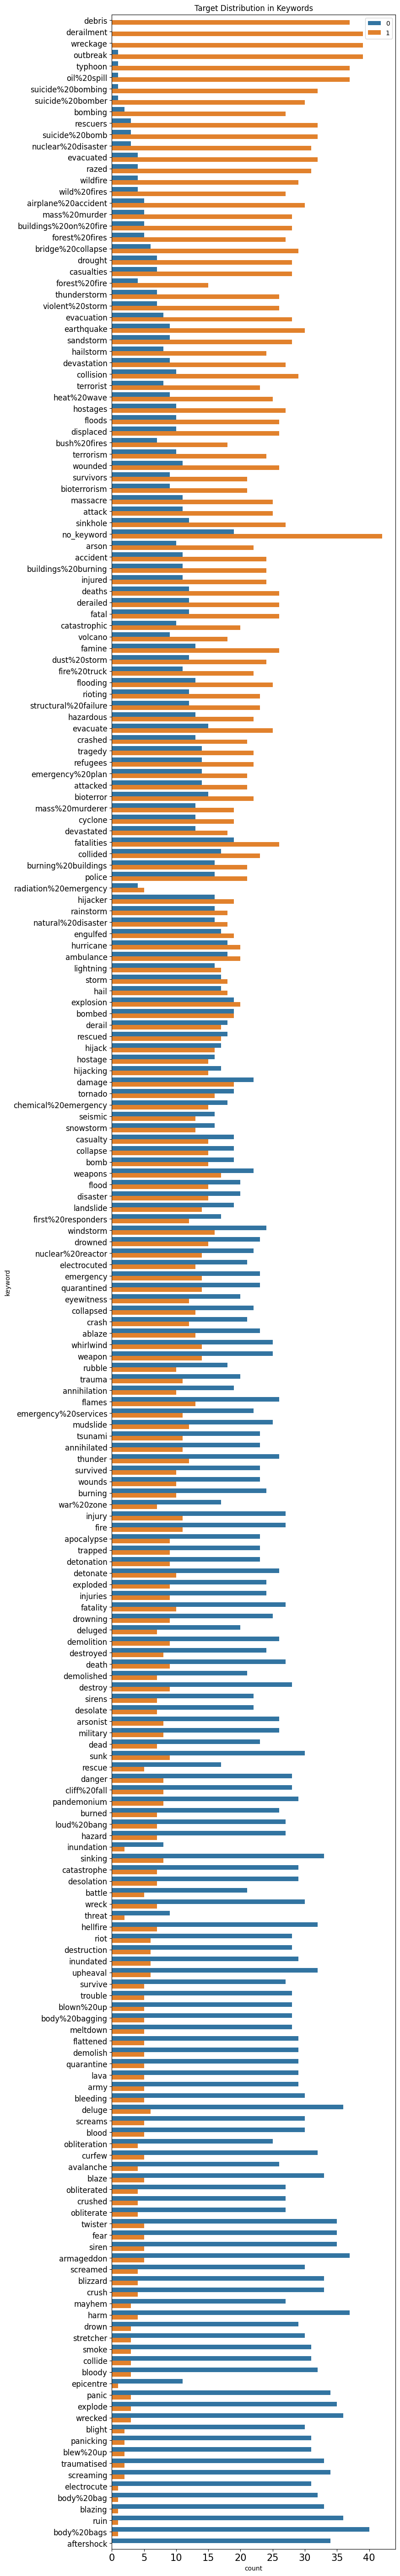

In [31]:
# Calculate target mean by keyword
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

# Create a figure
fig, ax = plt.subplots(figsize=(8, 72), dpi=100)

# Sort values by target mean and plot
sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'], ax=ax)

# Set labels and legend
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.legend(loc=1)

# Set title
plt.title('Target Distribution in Keywords')

# Show plot
plt.show()

# Drop the temporary 'target_mean' column
df_train.drop(columns=['target_mean'], inplace=True)


### 1.3.4. Linguistic Features of Disaster Tweets

Distributions of linguistic features in classes and datasets can be helpful to identify disaster tweets. For example, disaster tweets are often written in a more formal way with longer words compared to non-disaster tweets, because many disaster tweets come from news agencies. Non-disaster tweets, on the other hand, are often more informal and may contain more typos, because they are often written by individual users.

- `word_count`: number of words in text.
- `unique_word_count`: number of unique words in text.
- `stop_word_count`: number of stop words in text.
- `url_count`: number of urls in text.
- `mean_word_length`: average character count in words.
- `char_count`: number of characters in text.
- `punctuation_count`: number of punctuations in text.
- `hashtag_count`: number of hashtags (#) in text.
- `mention_count`: number of mentions (@) in text.

In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
# Exercise 2 - Implement the following data cleaning functions

def count_words(text):
    return len(word_tokenize(text))


def count_unique_words(text):
    return len(set(word_tokenize(text)))

def count_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return len([word for word in text.split() if word.lower() in stop_words])

def count_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return len(url_pattern.findall(text))

def mean_word_length(text):
    words = word_tokenize(text)
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)

def count_characters(text):
    return len(text)

def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)

def count_hashtags(text):
    return text.count('#')

def count_mentions(text):
    return text.count('@')

# Apply the functions to the dataframes
def apply_text_features(df):
    df['word_count'] = df['text'].apply(count_words)
    df['unique_word_count'] = df['text'].apply(count_unique_words)
    df['stop_word_count'] = df['text'].apply(count_stop_words)
    df['url_count'] = df['text'].apply(count_urls)
    df['mean_word_length'] = df['text'].apply(mean_word_length)
    df['char_count'] = df['text'].apply(count_characters)
    df['punctuation_count'] = df['text'].apply(count_punctuation)
    df['hashtag_count'] = df['text'].apply(count_hashtags)
    df['mention_count'] = df['text'].apply(count_mentions)

# Apply the functions to the dataframes
apply_text_features(df_train)
apply_text_features(df_test)

The distributions of all meta features in the training and test sets are very similar, which confirms that they were drawn from the same sample.

While all meta features contain information about the target variable, some, such as `url_count`, `hashtag_count`, and `mention_count`, are not as informative as others. In contrast, `word_count`, `unique_word_count`, `stop_word_count`, `mean_word_length`, `char_count`, and `punctuation_count` have very different distributions for disaster and non-disaster tweets, suggesting that they may be useful features for machine learning models.

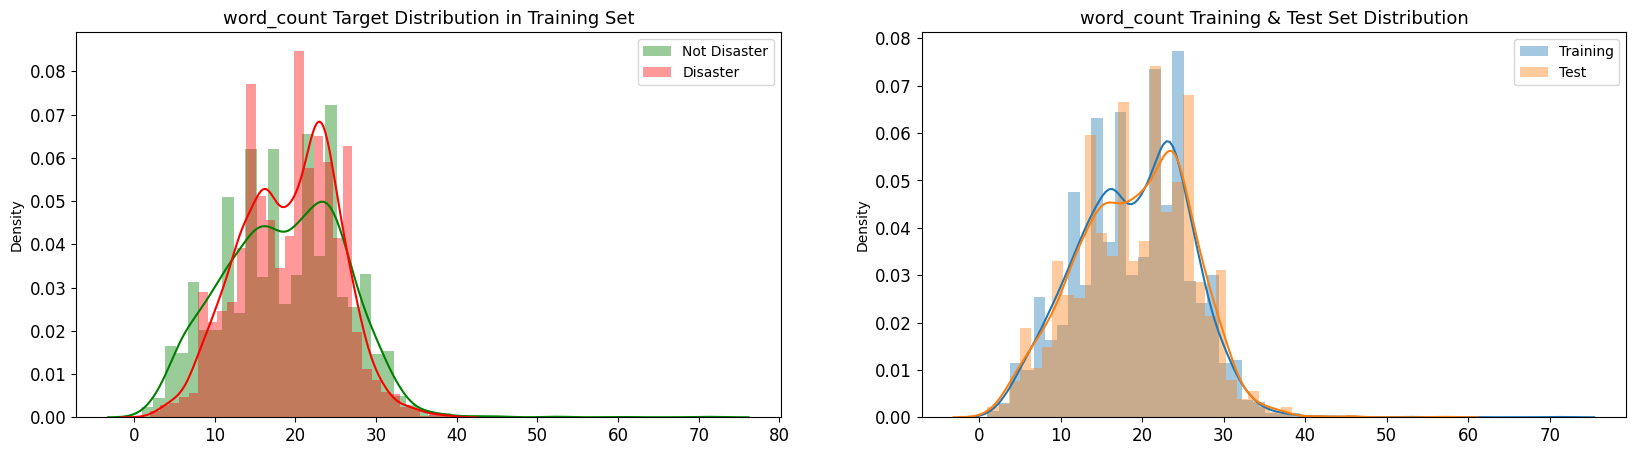

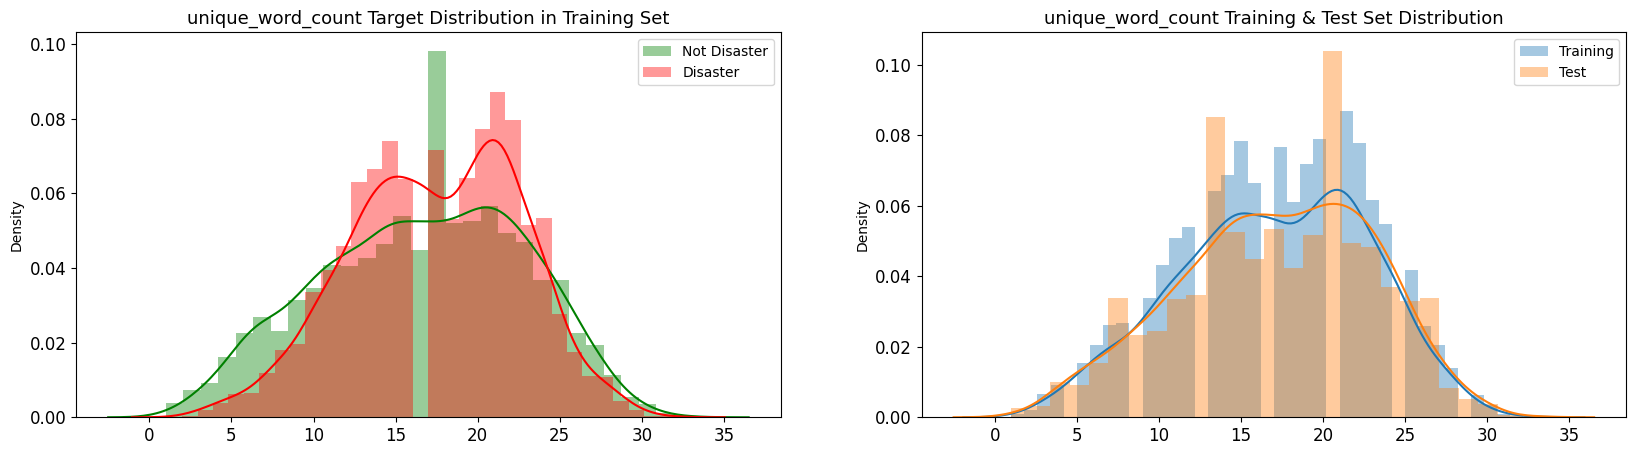

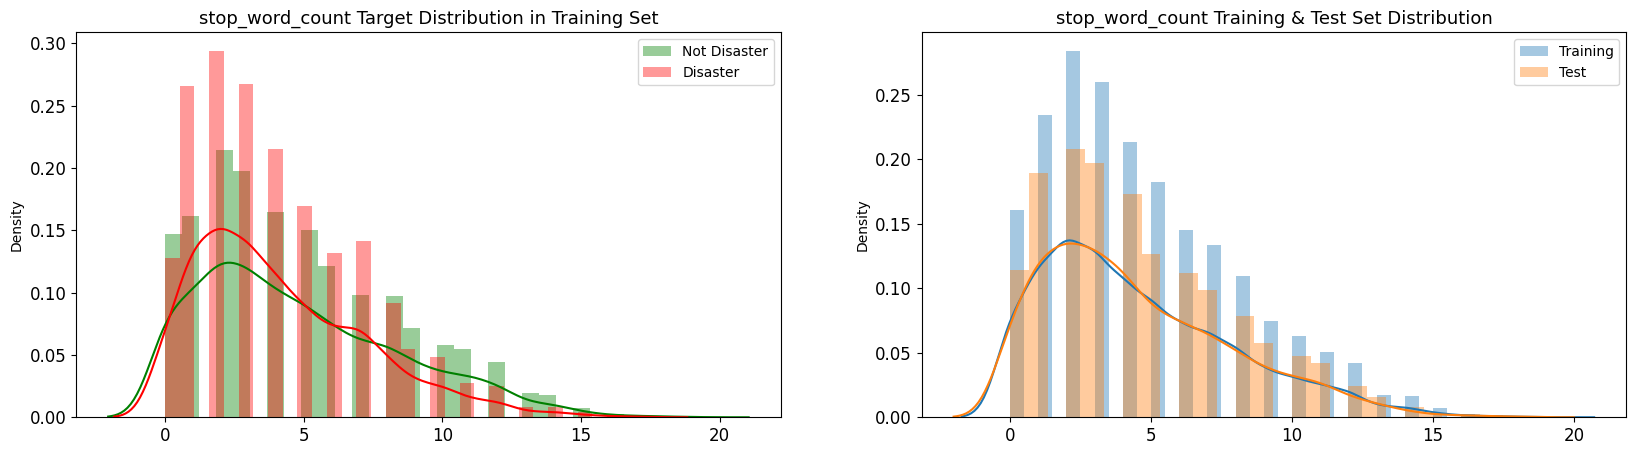

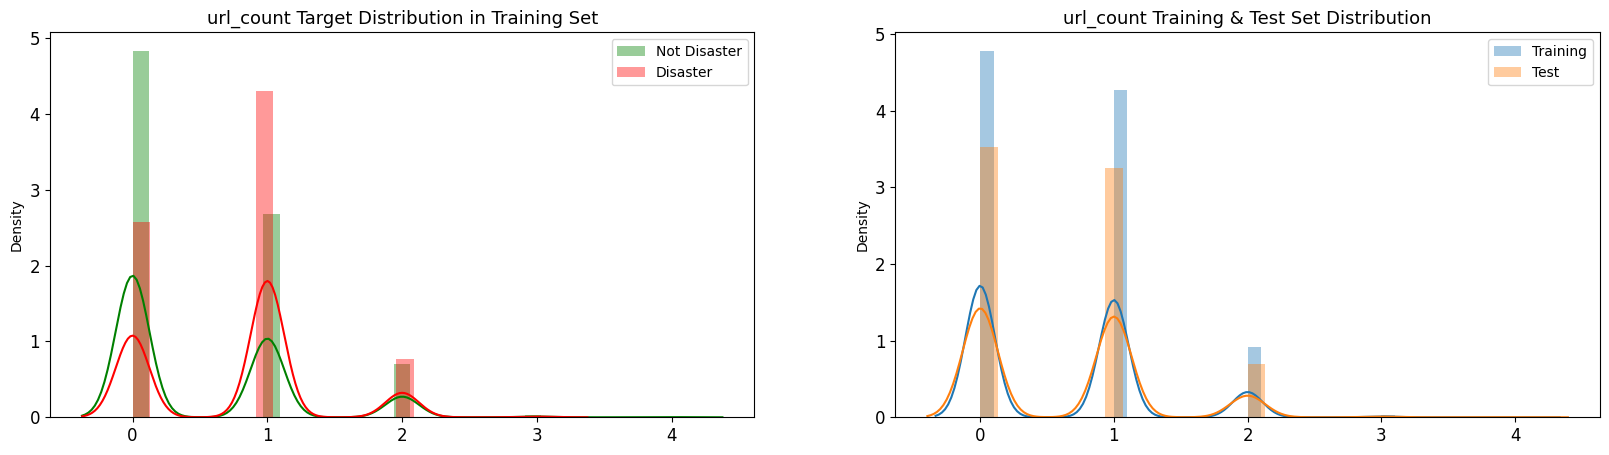

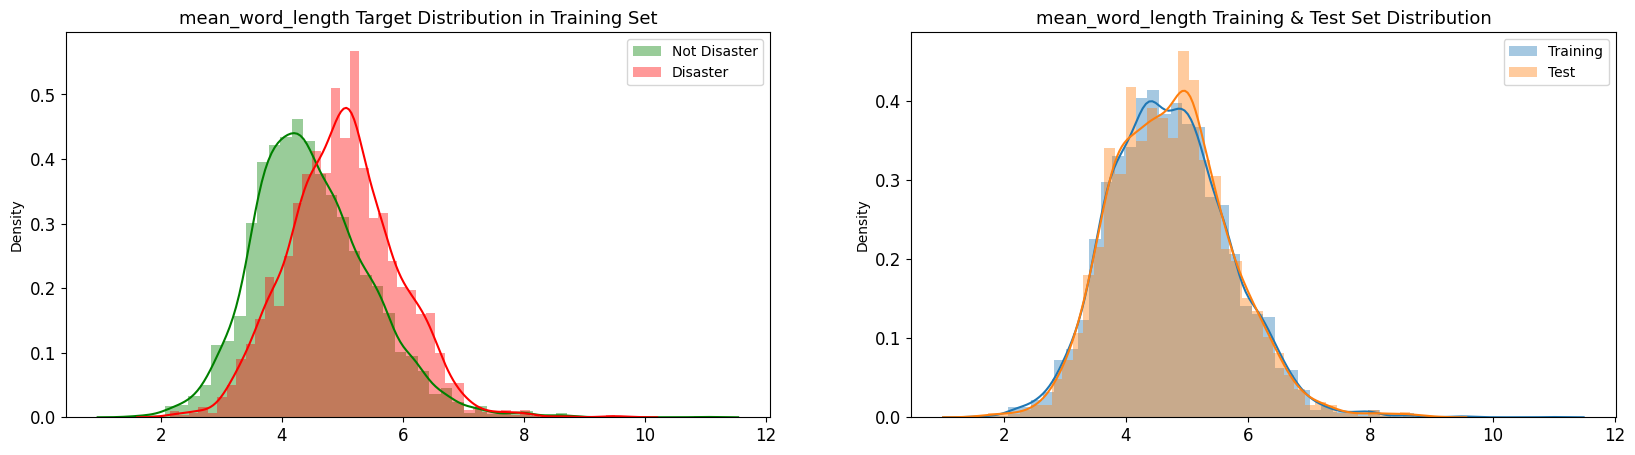

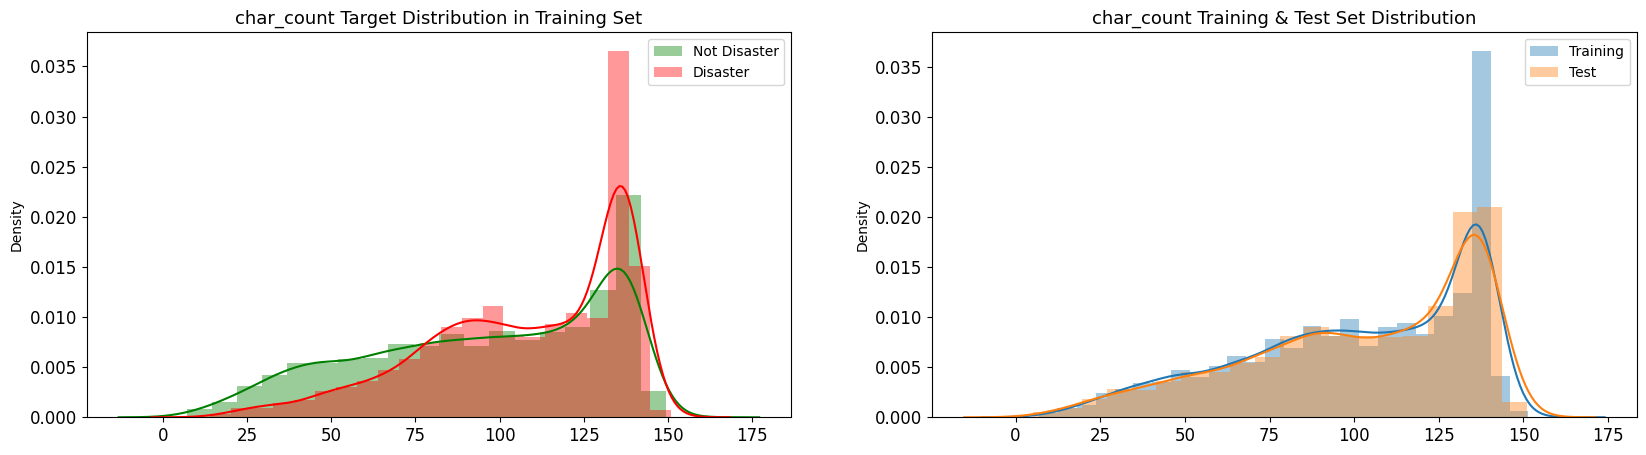

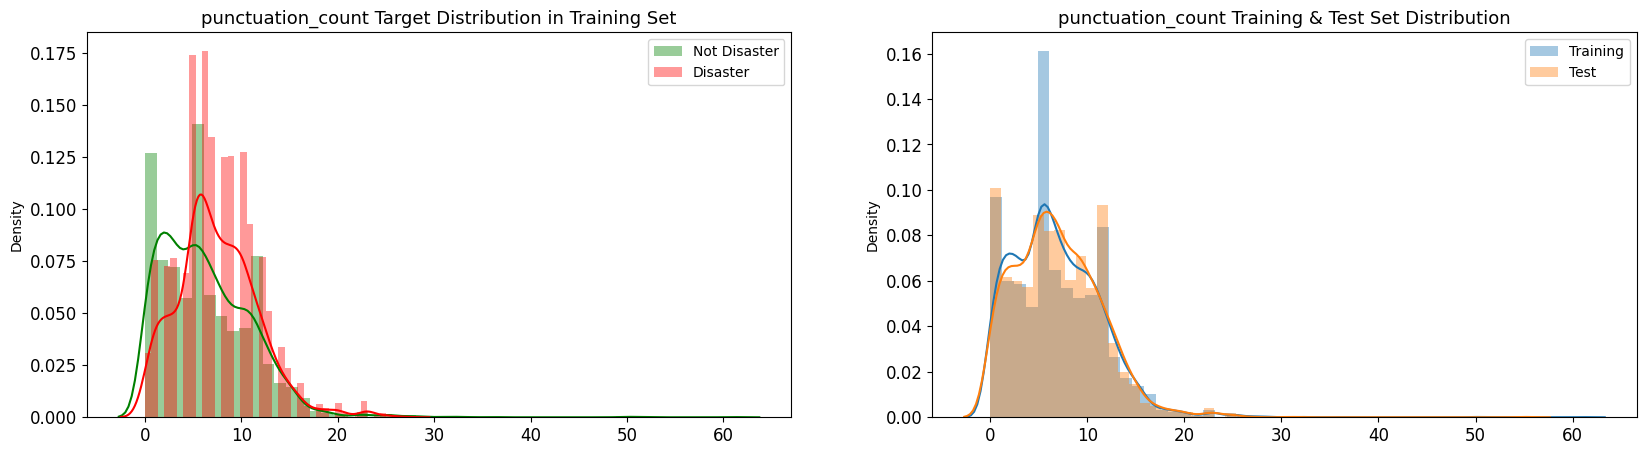

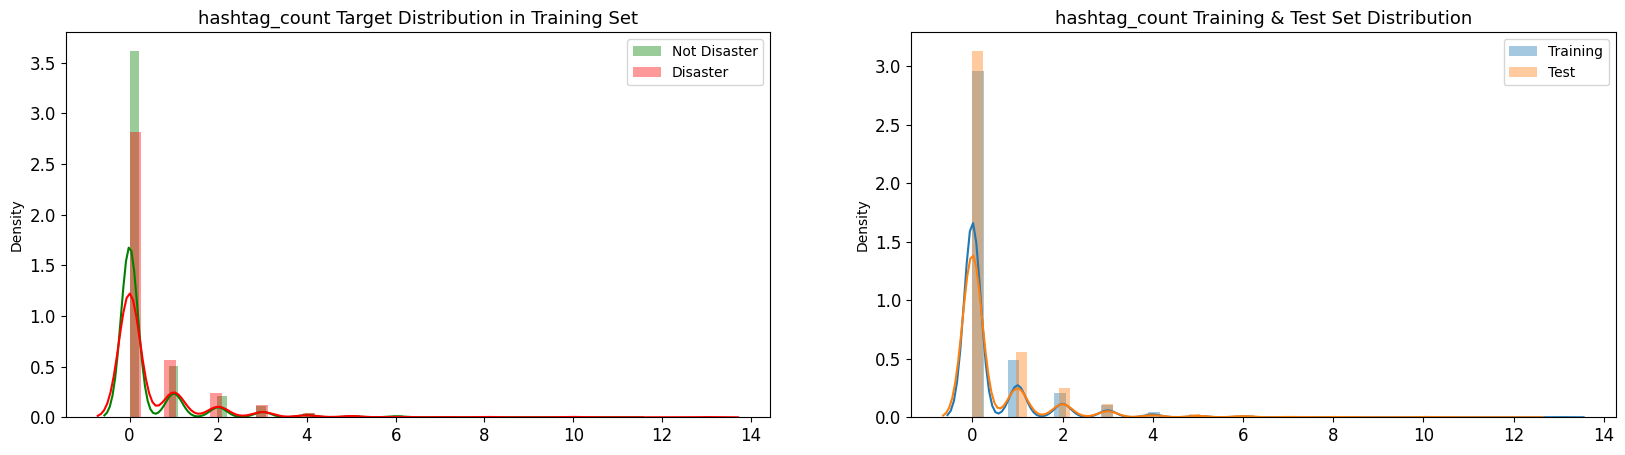

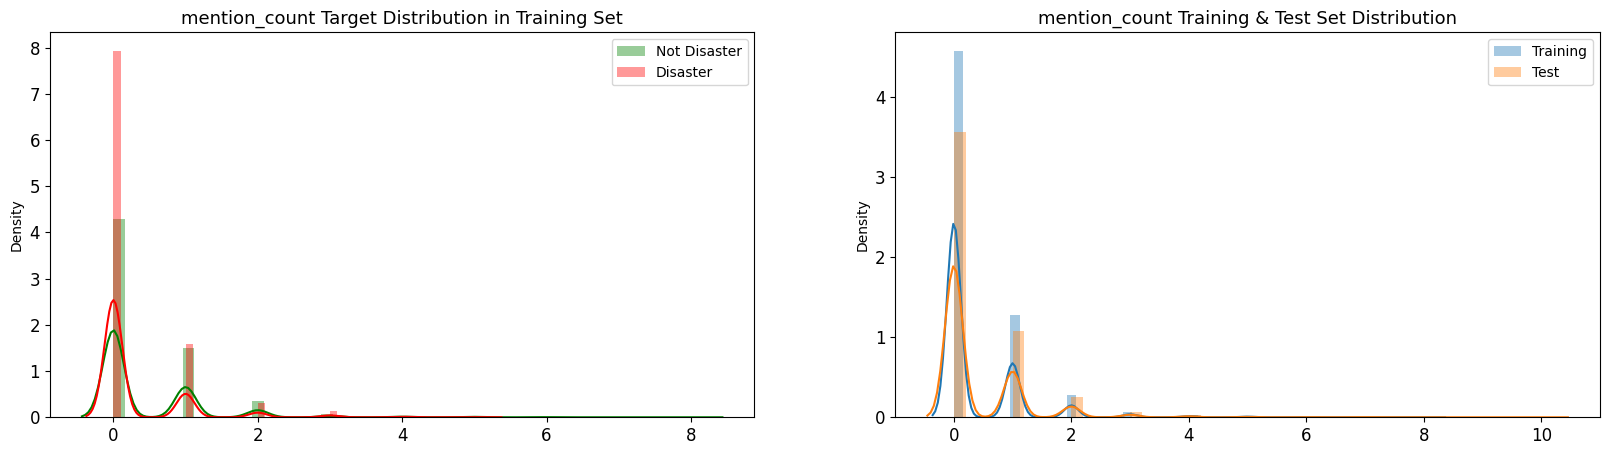

In [34]:
def plot_metafeature_distribution(df, feature, disaster_tweets):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 5), dpi=100)

    sns.distplot(df.loc[~disaster_tweets][feature], label='Not Disaster', ax=axes[0], color='green')
    sns.distplot(df.loc[disaster_tweets][feature], label='Disaster', ax=axes[0], color='red')

    sns.distplot(df[feature], label='Training', ax=axes[1])
    sns.distplot(df_test[feature], label='Test', ax=axes[1])

    for j in range(2):
        axes[j].set_xlabel('')
        axes[j].tick_params(axis='x', labelsize=12)
        axes[j].tick_params(axis='y', labelsize=12)
        axes[j].legend()

    axes[0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']

DISASTER_TWEETS = df_train['target'] == 1

for feature in METAFEATURES:
    plot_metafeature_distribution(df_train, feature, DISASTER_TWEETS)

plt.show()


### 1.3.5. Content Bigrams & Trigrams


In [35]:
def generate_ngrams(text, n_gram=1):
    tokens = [token for token in text.lower().split(' ') if token and token not in STOPWORDS]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

def count_ngrams(df, n_gram=1):
    disaster_ngrams = defaultdict(int)
    nondisaster_ngrams = defaultdict(int)

    for tweet in df[DISASTER_TWEETS]['text']:
        for word in generate_ngrams(tweet, n_gram=n_gram):
            disaster_ngrams[word] += 1

    for tweet in df[~DISASTER_TWEETS]['text']:
        for word in generate_ngrams(tweet, n_gram=n_gram):
            nondisaster_ngrams[word] += 1

    df_disaster_ngrams = pd.DataFrame(sorted(disaster_ngrams.items(), key=lambda x: x[1], reverse=True))
    df_nondisaster_ngrams = pd.DataFrame(sorted(nondisaster_ngrams.items(), key=lambda x: x[1], reverse=True))

    return df_disaster_ngrams, df_nondisaster_ngrams

def plot_top_ngrams(df_disaster, df_nondisaster, n, title, color):
    fig, axes = plt.subplots(ncols=2, figsize=(18, 45), dpi=100)

    for i, df in enumerate([df_disaster, df_nondisaster]):
        sns.barplot(y=df[0].values[:n], x=df[1].values[:n], ax=axes[i], color=color)

        axes[i].spines['right'].set_visible(False)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelsize=13)
        axes[i].tick_params(axis='y', labelsize=13)

        axes[i].set_title(f'Top {n} most common {title}', fontsize=15)

    plt.show()

N = 100

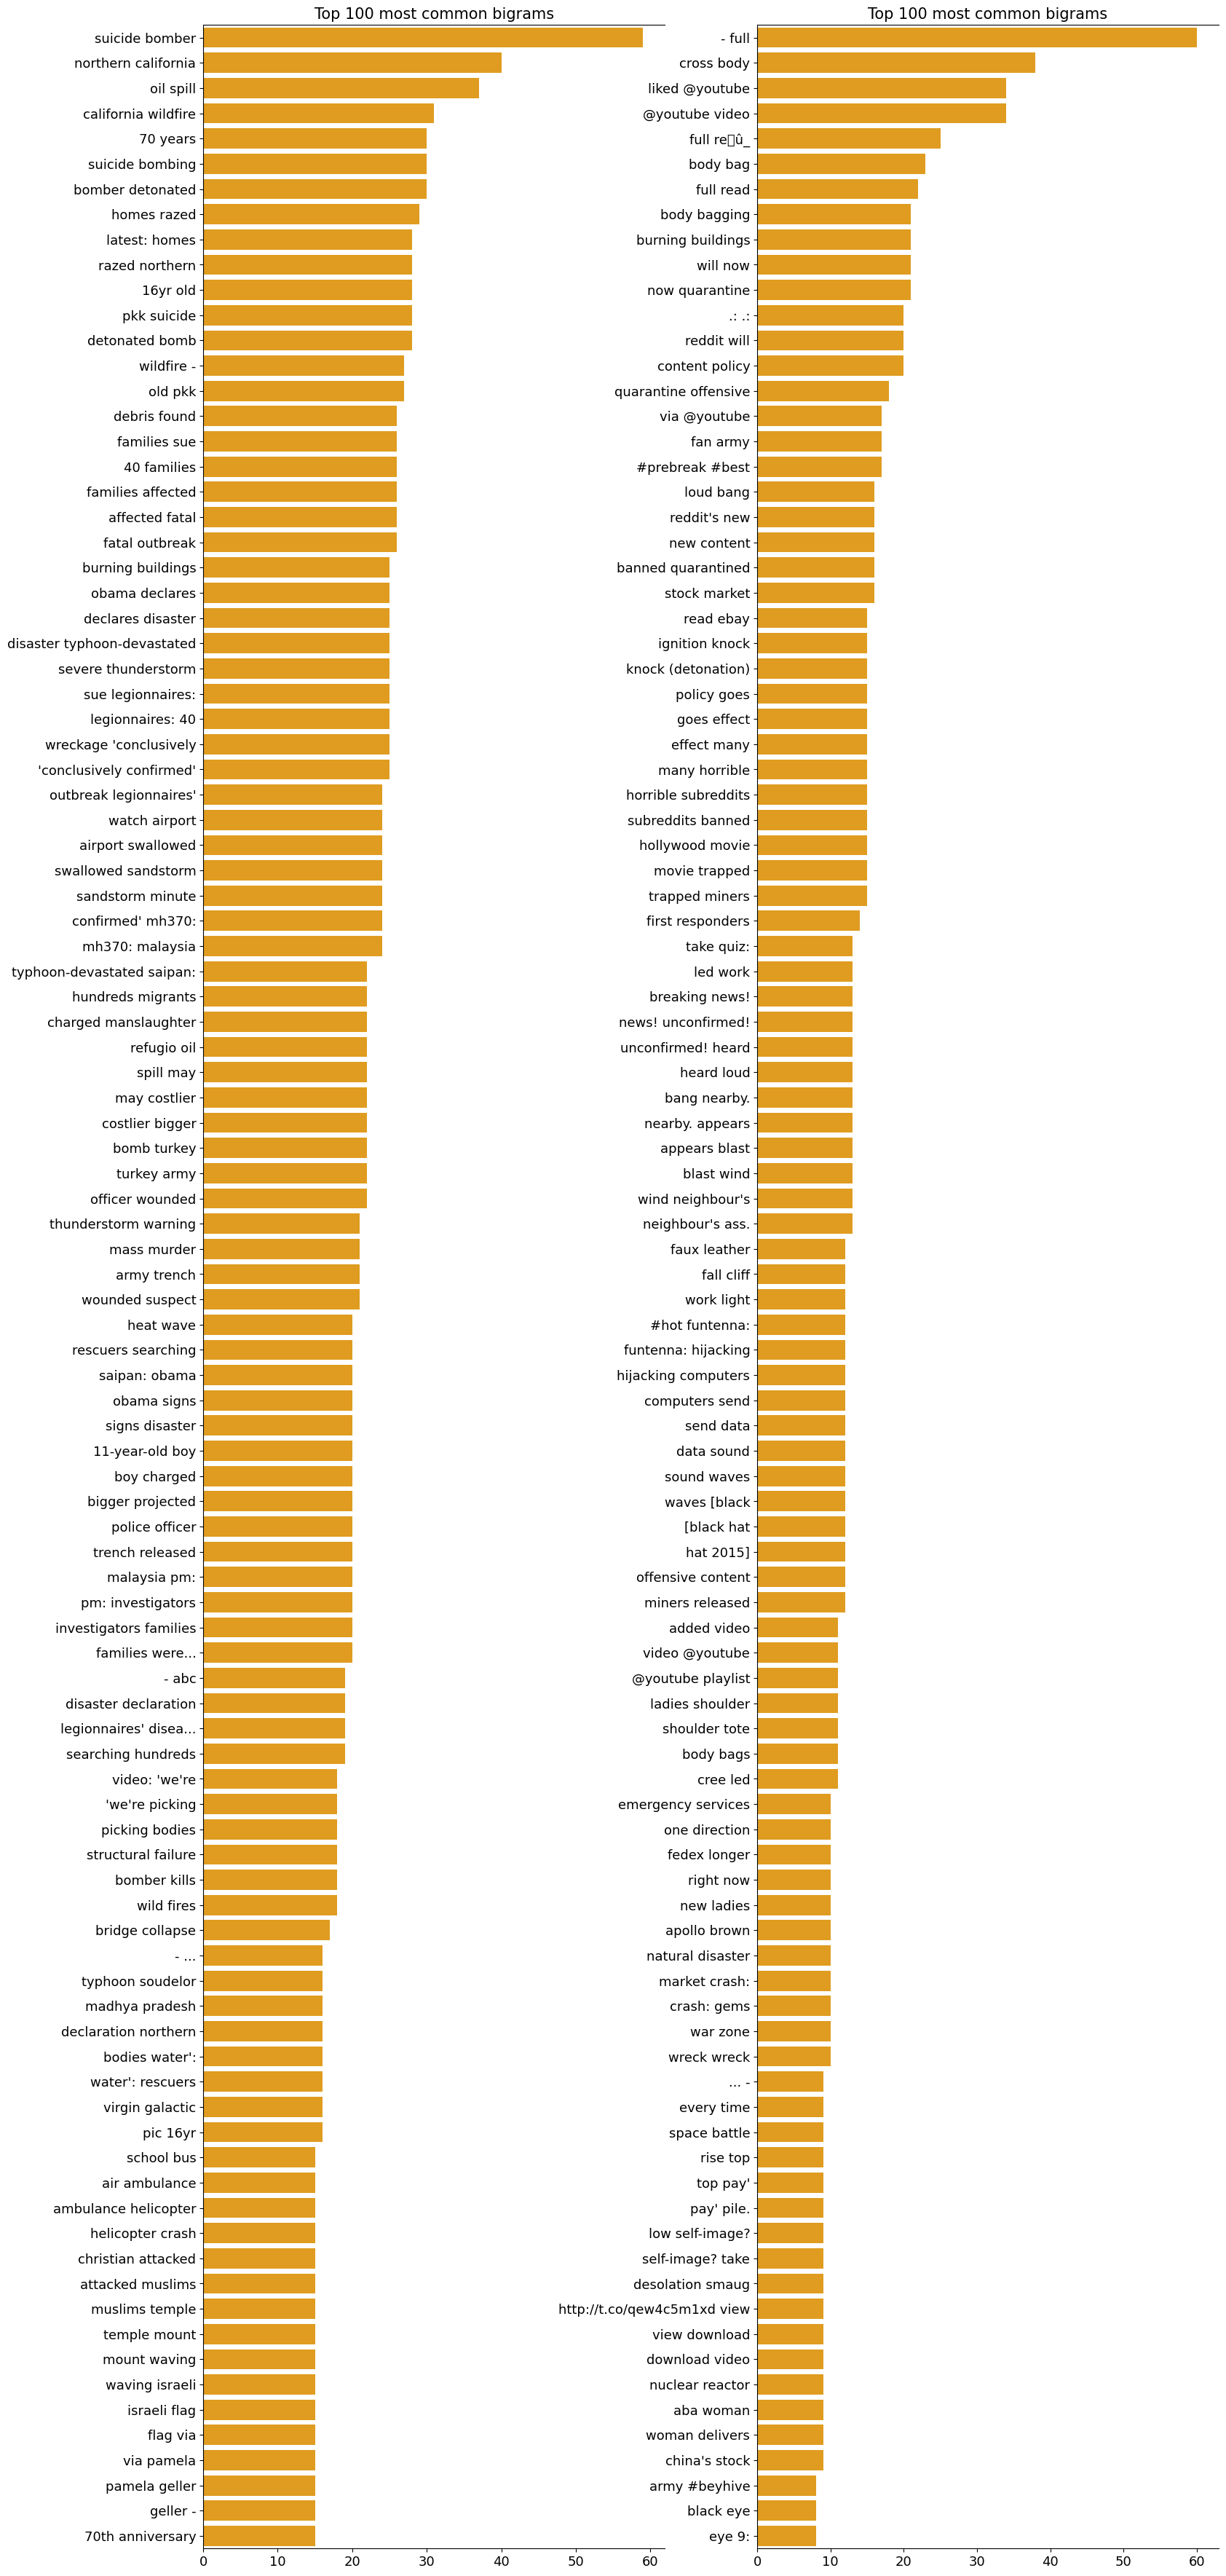

In [36]:
df_disaster_bigrams, df_nondisaster_bigrams = count_ngrams(df_train, n_gram=2)
plot_top_ngrams(df_disaster_bigrams, df_nondisaster_bigrams, N, 'bigrams', 'orange')

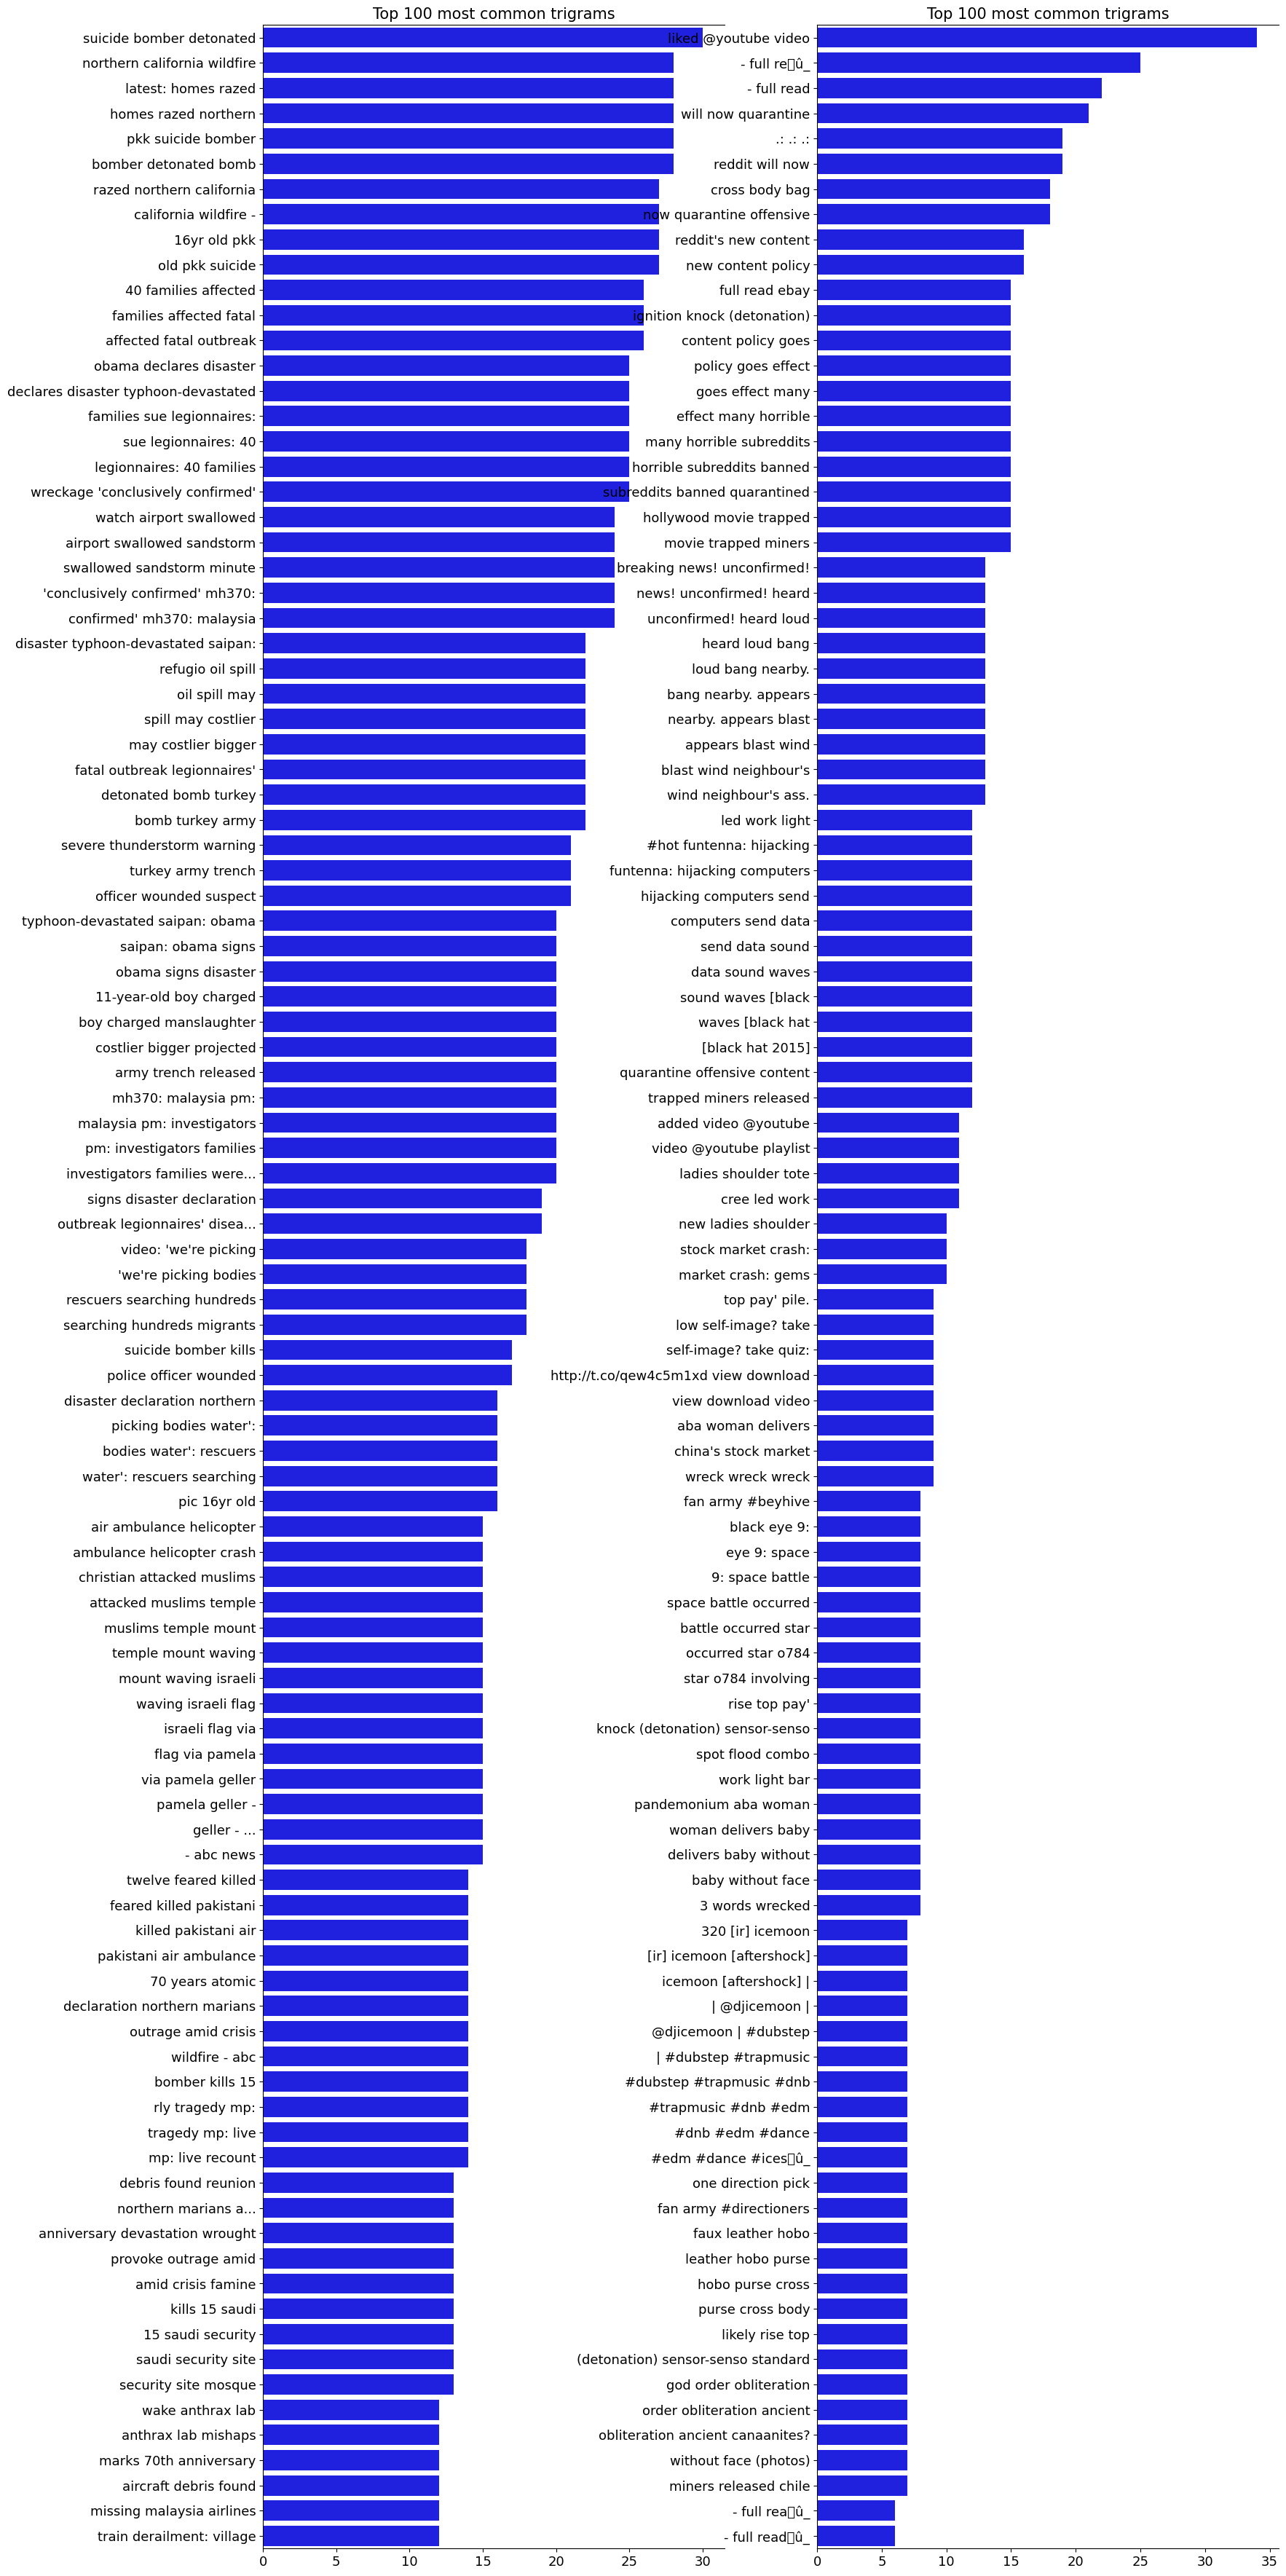

In [37]:
df_disaster_trigrams, df_nondisaster_trigrams = count_ngrams(df_train, n_gram=3)
plot_top_ngrams(df_disaster_trigrams, df_nondisaster_trigrams, N, 'trigrams', 'blue')


The absence of bigrams common to both disaster and non-disaster tweets suggests that the context is clearer in bigrams. The most common bigrams in disaster tweets provide more information about the disasters than unigrams, but punctuation must be removed from the words before analysis. The most common bigrams in non-disaster tweets are mostly about Reddit or YouTube and contain a lot of punctuation, which must also be removed from the words before analysis.




## 1.4. Data Cleaning

Tweets require significant cleaning, but it is inefficient to clean every tweet individually, as this would be too time-consuming. Therefore, a general cleaning approach must be implemented.

The most common type of word that requires cleaning in OOV (out-of-vocabulary) words is words with punctuation at the beginning or end. These words do not have embeddings because of the trailing punctuation. The following punctuation marks are separated from words:
```
#, @, !, ?, +, &, -, $, =, <, >, |, {, }, ^, ', (, ), [, ], *, %, ..., ', ., :, ;
```
- Special characters attached to words are removed completely.

- Punctuations are removed.

- Contractions are expanded.

- URLs are removed.

Finally, hashtags and usernames contain a lot of information about the context, but they are written without spaces between words, so they do not have embeddings. Informative usernames and hashtags should be expanded, but there are too many of them. I expanded as many as I could, but it takes too much time to run the `clean()` function after adding those replace calls.

In [38]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.2 MB/s eta 0:00:00


In [39]:
import contractions

In [41]:
# Exercise 3 - Implement the clean function

def clean(tweet):
    # TODO
    tweet = re.sub(r'[#@!?\+&\-\$=<>\|\{\}\^\'\(\)\[\]\*%,\.\:\;]', '', tweet)
    tweet = re.sub(r'http[s]?://\S+', '', tweet)
    tweet = contractions.fix(tweet)
    cleaned_tweet = tweet
    return cleaned_tweet


df_train['text_cleaned'] = df_train['text'].apply(lambda s : clean(s))
df_test['text_cleaned'] = df_test['text'].apply(lambda s : clean(s))

## 1.5. Construct Model's Input

#### Regarding the features we analyzed above, prepare the model's input text data for each row of the dataframes.


In [40]:
# Exercise 4

def create_model_input(row):
    text = row['text_cleaned']

    text += f' KEYWORD: {row["keyword"]}' if 'keyword' in row and pd.notna(row['keyword']) else ''

    text += f' WORD_COUNT: {row["word_count"]} UNIQUE_WORD_COUNT:{row["unique_word_count"]} STOP_WORD_COUNT:{row["stop_word_count"]} MEAN_WORD_LENGTH:{row["mean_word_length"]} CHAR_COUNT:{row["char_count"]} PUNCTUATION_COUNT:{row["punctuation_count"]}'


    disaster_bigrams = df_disaster_bigrams[0].values[:120]
    nondisaster_bigrams = df_nondisaster_bigrams[0].values[:120]

    text += ' '.join([f' {bigram}' for bigram in disaster_bigrams if bigram in row['text_cleaned'] and bigram not in nondisaster_bigrams])
    text += ' '.join([f' {bigram}' for bigram in nondisaster_bigrams if bigram in row['text_cleaned'] and bigram not in disaster_bigrams])

    return text

In [42]:
df_train['model_input'] = df_train.apply(create_model_input, axis=1)
df_test['model_input'] = df_test.apply(create_model_input, axis=1)

In [43]:
df_train['model_input']

0       Our Deeds are the Reason of this earthquake Ma...
1       Forest fire near La Ronge Sask Canada KEYWORD:...
2       All residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    aria_ahrary TheTawniest The out of control wil...
7610    M194 0104 UTC5km S of Volcano Hawaii http//tco...
7611    Police investigating after an ebike collided w...
7612    The Latest More Homes Razed by Northern Califo...
Name: model_input, Length: 7613, dtype: object

# 2. Model Selection & Configuration

This task is a classification task because we have a discrete target that must be predicted. Since there is a slight class imbalance, <u>accuracy would be biased</u>. Therefore, we choose **Mean harmonic F1-score** as our main metric for evaluating our model's performance.

For the <u>loss function</u>, we must use **Cross Entropy Loss** for this problem. With the loss function and metric chosen, the remaining settings are narrowed down to choosing the model's structure and some hyperparameters.

Mean F-Score, which can be implemented with Macro Average F1-Score, is a useful metric for imbalanced classification tasks. However, it is not very informative without Accuracy, Precision, and Recall, especially when the classes are almost balanced and it is hard to tell which class is harder to predict.

* Accuracy measures the fraction of the total sample that is correctly identified.
* Precision measures that out of all the examples predicted as positive, how many are actually positive.
* Recall measures that out of all the actual positives, how many examples were correctly classified as positive by the model.
* F1-Score is the harmonic mean of Precision and Recall.


### 2.1. Pre-trained Bert Model: **BERTweet**

BERTweet is the first public large-scale language model pre-trained for English Tweets. BERTweet is trained based on the RoBERTa pre-training procedure. The corpus used to pre-train BERTweet consists of 850M English Tweets (16B word tokens ~ 80GB), containing 845M Tweets streamed from 01/2012 to 08/2019 and 5M Tweets related to the COVID-19 pandemic.



In [44]:
from transformers import AutoModel, AutoTokenizer

class config:
    BERT_PATH = "vinai/bertweet-base"
    MAX_LEN = 128
    TRAIN_BATCH_SIZE = 16
    VALID_BATCH_SIZE = 8
    EPOCHS = 7
    MODEL_PATH = 'model.bin'


tokenizer = AutoTokenizer.from_pretrained(config.BERT_PATH, do_lower_case=True)
bert_model = AutoModel.from_pretrained(config.BERT_PATH)

config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.91M [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

In [45]:
# Exercise 5 - Complete the below code

class BERTweetClassifier(nn.Module):
    def __init__(self, bert_model):
        super(BERTweetClassifier, self).__init__()
        self.bert = bert_model

        # TODO: add a dropout layer with p=0.3
        self.bert_drop = torch.nn.Dropout(0.3)

        # TODO: add a linear layer for our classification task
        self.classifier = torch.nn.Linear(self.bert.config.hidden_size, 2)

    def forward(self, ids, mask, token_type_ids):
        # TODO: get the model's output
        bert_output = self.bert(ids, attention_mask=mask, token_type_ids=token_type_ids)

        # TODO: apply the model's dropout layer to the pooler output
        reguralized_output = self.bert_drop(bert_output.pooler_output)

        # TODO: call the classifier
        output =  self.classifier(reguralized_output)
        return output

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTweetClassifier(bert_model)
model.to(device)

BERTweetClassifier(
  (bert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(130, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Lay

### 2.2. Prepare Dataset:

Input text is tokenized using our BERT's tokenizer.

In [46]:
pip install transformers

In [47]:
# Exercise 6 - Tokenize the input text

def tokenize_input_texts(df, tokenizer, max_len):
    encoded_texts = [
        tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        for text in df['model_input']
    ]

    ids, masks = zip(*[(encoded['input_ids'], encoded['attention_mask']) for encoded in encoded_texts])

    return torch.cat(ids, dim=0), torch.cat(masks, dim=0)


### 2.3. Train & Evaluate:

In [48]:
# Exercise 7 - Complete the below code

def train_model(data_loader, model, optimizer, epoch, device, scheduler):
    model.train()
    epoch_loss = 0
    for data in tqdm(data_loader):
        ids = data["ids"]
        token_type_ids = data["token_type_ids"]
        mask = data["mask"]
        targets = data["target"]
        loss_function = nn.CrossEntropyLoss()

        ids = ids.to(device, dtype=torch.long)
        token_type_ids = token_type_ids.to(device, dtype=torch.long)
        mask = mask.to(device, dtype=torch.long)
        targets = targets.to(device)
        optimizer.zero_grad()

        # TODO: get the model's output and calculate the loss
        predictions = model(ids, mask, token_type_ids)
        loss = loss_function(predictions, targets)

        loss.backward()
        optimizer.step()
        scheduler.step()

        epoch_loss += loss.item()

    epoch_loss = epoch_loss / len(data_loader)
    return epoch_loss



def evaluate(data_loader, model, device):
    all_predictions = []
    all_targets = []
    model.eval()

    with torch.no_grad():
        for data in data_loader:
            ids = data["ids"]
            token_type_ids = data["token_type_ids"]
            mask = data["mask"]
            targets = data["target"]
            ids = ids.to(device, dtype=torch.long)
            token_type_ids = token_type_ids.to(device, dtype=torch.long)
            mask = mask.to(device, dtype=torch.long)
            targets = targets.to(device)

            # TODO: get the model's output
            outputs = model(ids, mask, token_type_ids)

            # TODO: calculate the probabilities of the model's output (between 0 and 1)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            probabilities = probabilities.cpu().detach()
            probabilities = probabilities.numpy().tolist()

            all_predictions.extend(probabilities)


            targets = targets.cpu().detach()
            targets = targets.numpy().tolist()

            all_targets.extend(targets)

    return all_predictions, all_targets

### 2.4. Fine-tune Model:

In [49]:
from transformers import get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
import torch
import numpy as np

In [50]:
from torch.utils.data import Dataset, DataLoader

class TweetDataset(Dataset):

    def __init__(self, tokens, targets):
        self.ids , self.masks = tokens
        self.targets = targets

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, i):
        return {
            'ids': self.ids[i],
            'mask': self.masks[i],
            'token_type_ids': torch.tensor([0] * config.MAX_LEN),
            'target': self.targets[i]
        }


In [51]:
train_targets = torch.from_numpy(np.array(df_train['target'], dtype=np.long))
test_targets = torch.from_numpy(np.array(df_test['target'], dtype=np.long))

train_dataset = TweetDataset(tokenize_input_texts(df_train, tokenizer, config.MAX_LEN), train_targets)
test_dataset = TweetDataset(tokenize_input_texts(df_test, tokenizer, config.MAX_LEN), test_targets)

train_dataloader = DataLoader(train_dataset, batch_size=config.TRAIN_BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=config.VALID_BATCH_SIZE, shuffle=False)

In [52]:
# Exercise 8 - Define the model's optimizer and learning-rate scheduler
learning_rate = 2e-5
optimizer = AdamW(model.parameters(), lr=learning_rate)



# TODO: use get_linear_schedule_with_warmup for the transformers lib
num_train_steps =  int(len(df_train) / config.TRAIN_BATCH_SIZE * config.EPOCHS)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_train_steps)

In [53]:
# Exercise 9 - Complete the code of the training loop

best_f1 = 0
val_metrics = []
print(f'Total no of epochs = {config.EPOCHS}')

for epoch in range(config.EPOCHS):
    with tqdm(range(len(train_dataloader)), leave=False, position=1, desc=' Steps') as p_bar:

        # TODO: train the model for 1 epochs
        train_loss = train_model(train_dataloader, model, optimizer, epoch, device, scheduler)
        p_bar.update()

        # TODO: evaluate the model on the test data
        outputs, targets = evaluate(test_dataloader, model, device)
        predicted_classes = [np.argmax(output) for output in outputs]

        # TODO: measure Accuracy, Precision, Recall, and F1-score metrics
        accuracy = accuracy_score(targets, predicted_classes)
        recall = recall_score(targets, predicted_classes)
        precision = precision_score(targets, predicted_classes)
        f1 = f1_score(targets, predicted_classes)


        print(f"\n epoch:{epoch} | Validation Accuracy: {accuracy} | Recall: {recall} | Precision: {precision} | F1 Score: {f1}")

        val_metrics.append({'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1})

        if f1 > best_f1:
            # TODO: save the best model based on the performance on f1, and update the best f1-score
            best_f1 = f1
            torch.save(model.state_dict(), config.MODEL_PATH)


Total no of epochs = 7


 Steps:   0%|          | 0/476 [00:00<?, ?it/s]

  0%|          | 0/476 [00:00<?, ?it/s]


 epoch:0 | Validation Accuracy: 0.8213300643579527 | Recall: 0.8195435092724679 | Precision: 0.7768762677484787 | F1 Score: 0.7976397084345713


 Steps:   0%|          | 0/476 [00:00<?, ?it/s]

  0%|          | 0/476 [00:00<?, ?it/s]


 epoch:1 | Validation Accuracy: 0.8139748697517621 | Recall: 0.8259629101283881 | Precision: 0.7613412228796844 | F1 Score: 0.7923366404379062


 Steps:   0%|          | 0/476 [00:00<?, ?it/s]

  0%|          | 0/476 [00:00<?, ?it/s]


 epoch:2 | Validation Accuracy: 0.8283787925222188 | Recall: 0.7938659058487875 | Precision: 0.8041907514450867 | F1 Score: 0.7989949748743719


 Steps:   0%|          | 0/476 [00:00<?, ?it/s]

  0%|          | 0/476 [00:00<?, ?it/s]


 epoch:3 | Validation Accuracy: 0.8296046582899173 | Recall: 0.7774607703281027 | Precision: 0.8170914542728636 | F1 Score: 0.7967836257309941


 Steps:   0%|          | 0/476 [00:00<?, ?it/s]

  0%|          | 0/476 [00:00<?, ?it/s]


 epoch:4 | Validation Accuracy: 0.8228623965675759 | Recall: 0.7888730385164051 | Precision: 0.7968299711815562 | F1 Score: 0.7928315412186381


 Steps:   0%|          | 0/476 [00:00<?, ?it/s]

  0%|          | 0/476 [00:00<?, ?it/s]


 epoch:5 | Validation Accuracy: 0.8329757891510879 | Recall: 0.7831669044222539 | Precision: 0.8200149365197908 | F1 Score: 0.8011674571324334


 Steps:   0%|          | 0/476 [00:00<?, ?it/s]

  0%|          | 0/476 [00:00<?, ?it/s]


 epoch:6 | Validation Accuracy: 0.8228623965675759 | Recall: 0.7960057061340942 | Precision: 0.7926136363636364 | F1 Score: 0.794306049822064


### 2.5 Visualize Model Performance:

In [54]:
pip install matplotlib


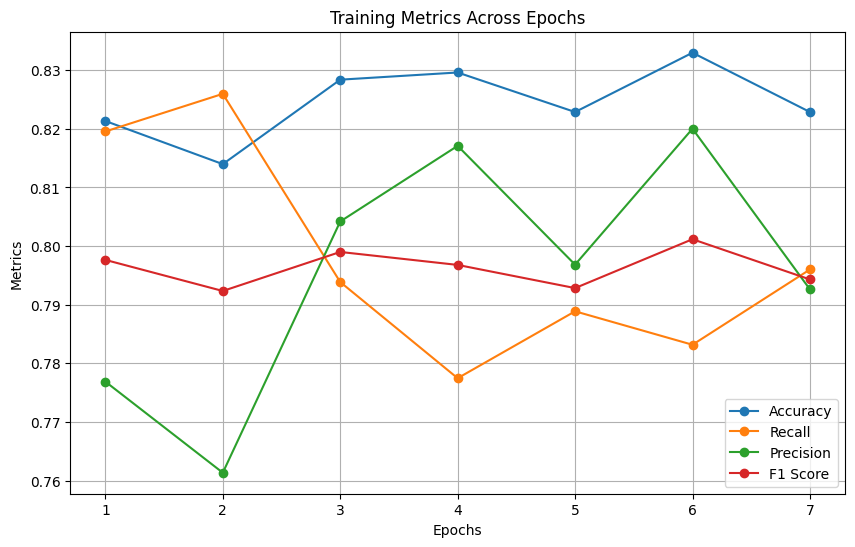

In [55]:
# Exercise 10 - Visualize training metrics (A, P, R, F1)
import matplotlib.pyplot as plt


accuracies = [x['accuracy'] for x in val_metrics]
recalls = [x['recall'] for x in val_metrics]
precisions = [x['precision'] for x in val_metrics]
f1_scores = [x['f1'] for x in val_metrics]
epochs = range(1, len(val_metrics) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracies, label='Accuracy', marker='o')
plt.plot(epochs, recalls, label='Recall', marker='o')
plt.plot(epochs, precisions, label='Precision', marker='o')
plt.plot(epochs, f1_scores, label='F1 Score', marker='o')

plt.title('Training Metrics Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.xticks(epochs)

plt.show()


### 2.6 Evaluate on Test Data:

In [56]:
# Exercise 11 - you have to reach an f1-score of at least 85% for full marks.

# TODO: load the best model
best_model = BERTweetClassifier(bert_model)
best_model.load_state_dict(torch.load(config.MODEL_PATH))
best_model.to(device)

# TODO: evaluate the model's performance on the test data and print it.
test_outputs, test_targets = evaluate(test_dataloader, best_model, device)
test_predicted_classes = [np.argmax(output) for output in test_outputs]

print(f"Test Accuracy: {accuracy_score(test_targets, test_predicted_classes)}")
print(f"Test Recall: {recall_score(test_targets, test_predicted_classes)}")
print(f"Test Precision: {precision_score(test_targets, test_predicted_classes)}")
print(f"Test F1 Score: {f1_score(test_targets, test_predicted_classes)}")

Test Accuracy: 0.8329757891510879
Test Recall: 0.7831669044222539
Test Precision: 0.8200149365197908
Test F1 Score: 0.8011674571324334


<div dir="rtl" style="text-align: justify">
<font face="XB Zar" size=4>
    <h1>
    <b>رتبه‌بندی نویسندگان (15 نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>  
    برای رتبه‌بندی نویسندگان، مفهوم ارجاع نویسندگان به یکدیگر مطرح می‌شود. زمانی که نویسنده A در مقاله خود به مقاله P که نویسنده B جزو نویسندگان آن مقاله یعنی مقاله P می‌باشد، ارجاع دهد، می‌گوییم که نویسنده A به نویسنده B ارجاع داده است. با توجه به این رابطه، می‌توان گراف ارجاعات بین نویسندگان را ایجاد و سپس با استفاده از الگوریتم HITS
نویسندگان را رتبه‌بندی کرد. برای رتبه‌بندی نیاز است تا از شاخص‌های hub و authority استفاده کنیم.


</font>
</div>

In [41]:
import networkx as nx
from collections import defaultdict

In [55]:
def hits_algorithm(papers, n):
    """
        Implementing the HITS algorithm to score authors based on their papers and co-authors.

        Parameters
        ---------------------------------------------------------------------------------------------------
        papers: A list of paper dictionaries with the following keys:
                "id": A unique ID for the paper
                "title": The title of the paper
                "abstract": The abstract of the paper
                "date": The year in which the paper was published
                "authors": A list of the names of the authors of the paper
                "related_topics": A list of IDs for related topics (optional)
                "citation_count": The number of times the paper has been cited (optional)
                "reference_count": The number of references in the paper (optional)
                "references": A list of IDs for papers that are cited in the paper (optional)
        n: An integer representing the number of top authors to return.

        Returns
        ---------------------------------------------------------------------------------------------------
        List
        list of the top n authors based on their hub scores.
    """
    G = defaultdict(list)

    for paper in papers:
        G[paper['Id']] = []
        for author in paper['authors']:
            G[author].append(paper['Id'])

    node_ids = list(G.keys())
    node_id_to_index = {node_id: index for index, node_id in enumerate(node_ids)}
    index_to_node_id = {index: node_id for index, node_id in enumerate(node_ids)}

    matrix = np.zeros((len(G), len(G)), dtype=np.float32)

    for node_id, neighbors in G.items():
        node_index = node_id_to_index[node_id]
        for neighbor in neighbors:
            matrix[node_index][node_id_to_index[neighbor]] += 1

    hubs, authorities = np.ones(len(G), dtype=np.float32), np.ones(len(G), dtype=np.float32)

    for _ in range(100):
        hubs = (matrix @ authorities) / np.sum(matrix @ authorities)
        authorities = (matrix.T @ hubs) / np.sum(matrix.T @ hubs)

    top_authors = [index_to_node_id[i] for i in np.argsort(hubs)[::-1][:n]]
    return top_authors


In [56]:
Professor = 'Rohban'
with open(Professor + '.json') as f:
    papers = json.load(f)
top_authors = hits_algorithm(papers, 10)
print(top_authors)

['Anne E Carpenter', 'Shantanu Singh', 'Juan C. Caicedo', 'Allen Goodman', 'Tim Becker', 'Kyle W. Karhohs', 'Claire McQuin', 'Beth A. Cimini', 'Mohammad Hossein Rohban', 'Marzieh Haghighi']
